# Insurance Claims Severity 

### Objective
* build a regression model to predict how sever is a claim. 
* good code documentation
* explain your results in the context of the claim severity, give some insights or conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

## 1. Load Data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df=pd.concat([train,test]).reset_index(drop=True)

In [3]:
print (df.shape)
print (train.shape,test.shape)

(313864, 132)
(188318, 132) (125546, 131)


In [4]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
test.head()
# -loss column

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [6]:
df.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
Length: 132, dtype: object

## 2. EDA

### 2.1 Data Quality Check

In [7]:
train.isna().sum().reset_index()

,index,0
0,id,0
1,cat1,0
2,cat2,0
3,cat3,0
4,cat4,0
...,...,...
127,cont11,0
128,cont12,0
129,cont13,0
130,cont14,0


### 2.2 Group obj/num variables

In [8]:
num_var=list(df.select_dtypes(include=np.number))
print (len(num_var))
num_var

16


['id',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'loss']

In [9]:
obj_var=list(df.select_dtypes(include=np.object))
print (len(obj_var))
obj_var

116


['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [10]:
num_var.remove('id')
num_var.remove('loss')
print (len(num_var))
num_var

14


['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

### 2.2 Explore Data

- obj_var:
    - EDA plots
- num_var:
    - EDA plots
    - correlation matrix
- target
    - plots
    - log plots

### obj_var

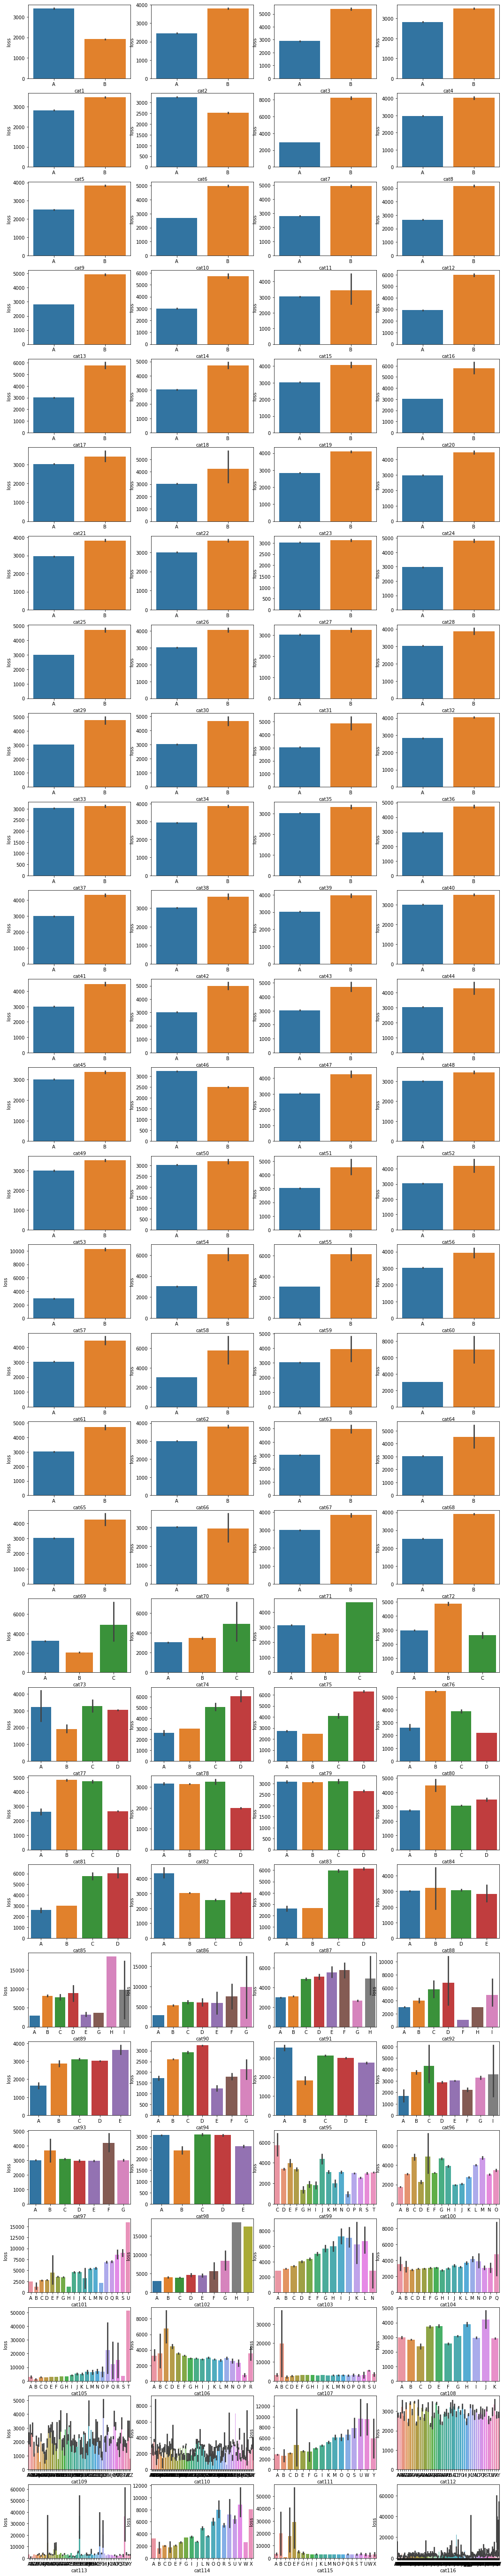

In [11]:
# obj_var 116=4*29
fig,axes = plt.subplots(29,4,figsize=(18,100))

i=0
m=0
for i in range(len(obj_var)):
    while m<29:
        n=0
        while n<4:
            sns.barplot(ax=axes[m, n], data=train, x=obj_var[i], y='loss',
                        order=np.sort(train[obj_var[i]].unique()))
            i=i+1
            n=n+1
        m=m+1

### num_var

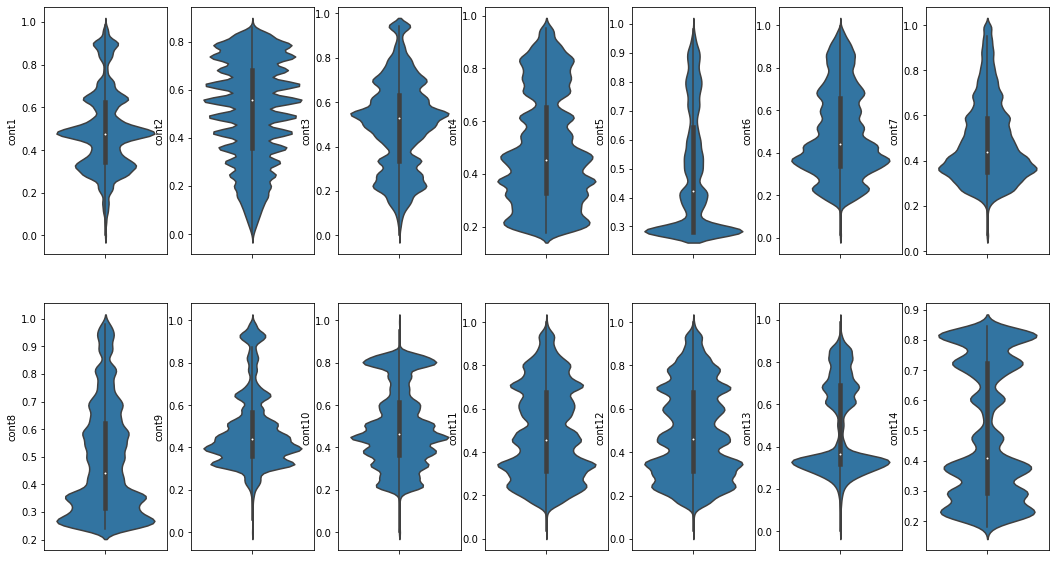

In [12]:
# num_var 14=2*7
fig,axes = plt.subplots(2,7,figsize=(18,10))

i=0
m=0
for i in range(len(num_var)):
    while m<2:
        n=0
        while n<7:
            sns.violinplot(ax=axes[m, n], data=train, y=num_var[i])
            i=i+1
            n=n+1
        m=m+1

### correlation matrix

In [13]:
corr=train[num_var].corr()
corr

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688
cont2,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584
cont3,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592
cont4,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445
cont5,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638
cont6,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178
cont7,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286
cont8,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539
cont9,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154
cont10,0.808551,0.063526,-0.325562,0.283294,-0.064967,0.883351,0.492621,0.336588,0.785697,1.000000,0.702896,0.713812,0.707876,0.041808


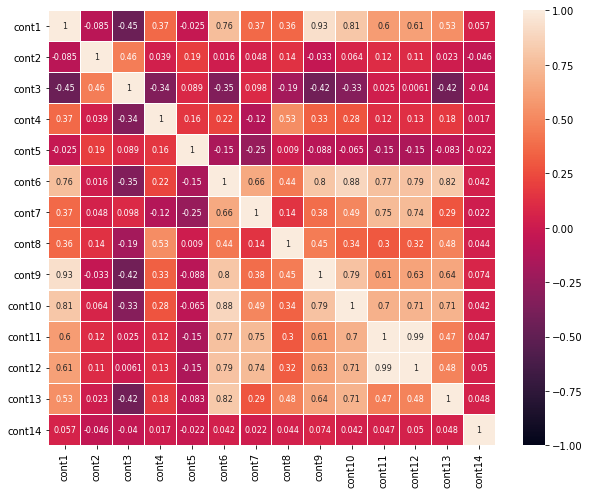

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}
           )

#### high correlated: con1& con9, con11&con12, con6&con10
This represents an opportunity to reduce the features through transformations such as PCA.

### target

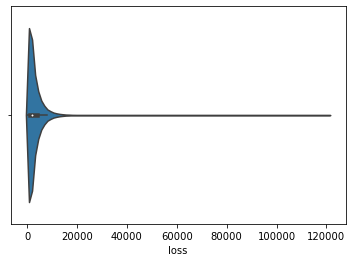

In [15]:
sns.violinplot(train.loss)

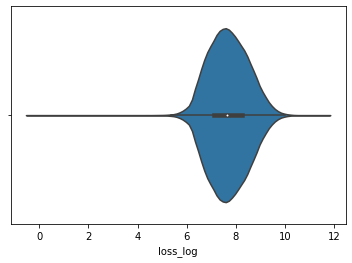

In [16]:
train['loss_log']=np.log(train.loss)
sns.violinplot(train.loss_log)

### 3. Feature Engineering

- 3.1 Label Encoding
- 3.2 One hot Encoding
- 3.3 Skewness and standardlization (Num var)¶

### 3.1 Label Encoding

In [17]:
from sklearn import preprocessing

In [18]:
LBL=preprocessing.LabelEncoder()
LE_map={}
for i in obj_var:
    df[i]=LBL.fit_transform(df[i])
    LE_map[i]=dict(zip(LBL.classes_,LBL.transform(LBL.classes_)))

In [19]:
LE_map

{'cat1': {'A': 0, 'B': 1},
 'cat2': {'A': 0, 'B': 1},
 'cat3': {'A': 0, 'B': 1},
 'cat4': {'A': 0, 'B': 1},
 'cat5': {'A': 0, 'B': 1},
 'cat6': {'A': 0, 'B': 1},
 'cat7': {'A': 0, 'B': 1},
 'cat8': {'A': 0, 'B': 1},
 'cat9': {'A': 0, 'B': 1},
 'cat10': {'A': 0, 'B': 1},
 'cat11': {'A': 0, 'B': 1},
 'cat12': {'A': 0, 'B': 1},
 'cat13': {'A': 0, 'B': 1},
 'cat14': {'A': 0, 'B': 1},
 'cat15': {'A': 0, 'B': 1},
 'cat16': {'A': 0, 'B': 1},
 'cat17': {'A': 0, 'B': 1},
 'cat18': {'A': 0, 'B': 1},
 'cat19': {'A': 0, 'B': 1},
 'cat20': {'A': 0, 'B': 1},
 'cat21': {'A': 0, 'B': 1},
 'cat22': {'A': 0, 'B': 1},
 'cat23': {'A': 0, 'B': 1},
 'cat24': {'A': 0, 'B': 1},
 'cat25': {'A': 0, 'B': 1},
 'cat26': {'A': 0, 'B': 1},
 'cat27': {'A': 0, 'B': 1},
 'cat28': {'A': 0, 'B': 1},
 'cat29': {'A': 0, 'B': 1},
 'cat30': {'A': 0, 'B': 1},
 'cat31': {'A': 0, 'B': 1},
 'cat32': {'A': 0, 'B': 1},
 'cat33': {'A': 0, 'B': 1},
 'cat34': {'A': 0, 'B': 1},
 'cat35': {'A': 0, 'B': 1},
 'cat36': {'A': 0, 'B': 1},
 

### 3.2 One hot Encoding

In [20]:
OHE=preprocessing.OneHotEncoder(sparse=True)
df_sparse=OHE.fit_transform(df[obj_var])
df_sparse.shape

(313864, 1176)

### 3.3 Skewness and standardlization (Num var)

In [21]:
from scipy.stats import skew,boxcox

In [22]:
skewed_cols=df[num_var].apply(lambda x:skew(x.dropna()))
skewed_cols.sort_values()

cont2    -0.311146
cont3    -0.007023
cont14    0.250673
cont11    0.281139
cont12    0.291997
cont10    0.352116
cont13    0.376138
cont4     0.417559
cont6     0.458413
cont1     0.513205
cont8     0.673237
cont5     0.679610
cont7     0.825889
cont9     1.067247
dtype: float64

#### box-cox transformations

In [23]:
threshold=0.15
skewed_cols=skewed_cols[abs(skewed_cols)>threshold].index.values
skewed_cols

array(['cont1', 'cont2', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype=object)

In [24]:
for i in skewed_cols: 
    df[i] , lam = boxcox(df[i]+1)

#### standard scaling

In [25]:
SSL=preprocessing.StandardScaler()
for i in num_var:
     df[i] = SSL.fit_transform(df[i].values.reshape(-1,1))

## 4. Modeling: XGBoost

In [39]:
import xgboost as xgb
from scipy import sparse
from sklearn import metrics
from sklearn.model_selection import KFold, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [29]:
df_sparse=sparse.hstack((df_sparse,df[num_var]),format='csr')
df_sparse.shape

(313864, 1190)

In [32]:
train_size = train.shape[0]
test_size=test.shape[0]

In [33]:
train_x=df_sparse[:train_size]
test_x=df_sparse[train_size:]
train_y=np.log(df[:train_size].loss.values+200)
ID=df.id[:train_size].values

In [ ]:
def log_regobj(labels,preds):
    con=2
    x=preds-labels
    grad=con*x/(np.abs(x)+con)
    hess=con**2/(np.abs(x)+con)**2
    return grad,hess

In [ ]:
def log_mae(y,yhat):
    return mean_absolute_error(np.exp(y),np.exp(yhat))

In [ ]:
log_mae_scorer=metrics.make_scorer(log_mae,greater_is_better=False)